# STAT207 Final Project - Exploring the Relationship Between Stroke Incidence and BMI: Through Linear Regression, Logistic Regression and Hypothesis Testing

Adam Orencia - adamto2
Kat Souleles - ks89

## 1. Introduction

Dataset explanation: 
In the United States, the annual incidence of stroke is approximately 795,000, of which approximately 610,000 are first-ever stroke events
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8308685/

Undersatnding the correlation between BMI and other personal factors can provide valuable insights for medical research and aid in taking preventative measures to protect individuals from strokes and other health risks.
 

Research Questions:

Linear Regression - 

- Is there a linear relationship between an indivdiauls BMI and their gender, age, average glucose level, and their hypertension?

- What variables should be included to build a parsimonious model for predicting BMI?

Logistic Regression - 

- Is there a linear relationship between an individuals age, having hypertension, BMI, and average glucose level, and the likelihood of an individual having a stroke? 
- How well will our logistic model perform on training data?
- How will will our logisitc model perform on new data? 

Inference Research Question - 
-  What is the relationship between stroke (categorical) and BMI in our dataset?
- Is there a significant association between BMI and the occurence of stroke in the population based on sample data? 

Understanding how BMI relates to the variables mentioned above can be beneficial for medical research and understanding connections within the human body. This information can be used to identify individuals that are at a higher risk for strokes and benefit them by increasing awareness and receiving care earlier on. Creating these models could be used to create helpful predictions to determine whether or not an individual is at risk for a stroke. 

Missing values, Limitations, Ethics

One limitation that exists within our data is that we have limited variables, meaning there could be other factors in the human body or our environment that contribute to an individual's likelihood of having a stroke that were not included. Another limitation is that the data is unbalanced. Based on the sample, the number of people who have had strokes are underepresented. We were able to counteract this limitation in our analysis by randomly sampling roughly 1000 individuals from the data and were able to increase the stroke representation from about 4% to nearly 16%. This was very important when it came to creating models and allowing our regression techniques to be as accurate as possible.

Regarding the dataset itself, there may be ethical concerns about consent and confidentiality. But this dataset was collected by the World Health Organization in an anonymous manner, eliminating any risks to subjects within it. 

In [3]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [5]:
df = pd.read_csv("stroke.csv")
df.head(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Missing Values: 

In [71]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [308]:
#Dropping Missing Values from dataset
df = df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [73]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

Dropping the 1 'other', not helpful for data. 

In [6]:
#The gender variable has one 'other' 
#we will drop this 1 as it should not have any statistical significance.
df = df[df['gender'] != 'Other']
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [35]:
print(df['stroke'].value_counts(normalize=True))

No     0.957416
Yes    0.042584
Name: stroke, dtype: float64


The code above shows the underrepresentation of people who have had strokes in our dataset at just ~4%. This concern was addressed thoroughly before logisitc regression and should not have any major affects on linear regression. 

## 2. Linear Regression and Feature Selection

BMI is a measure of one's body weight in relation to their height and it can be a helpful indicator of possible health risks. By evaluating one's BMI we can further understand health trends and effectively identify at-risk groups in the population. 

In a study : Higher BMI (overweight or obese group) was associated with an increased overall risk of stroke : https://pubmed.ncbi.nlm.nih.gov/35971008/

Now that we understand the potential relationship between BMI and having a stroke, its time for us to explore this BMI variable more in-depth. 

We started by selecting four variables we thought may have a larger effect on BMI just off first glance and built an initial model with them. 

Research Question: 

Is there a linear relationship between an indivdiauls BMI and their gender, age, average glucose level, and their hypertension? 

From here we were interested in building the best possible model rather than randomly selecting four variables, which left us with this question.


Research Question 2:

What variables should be included to build a parsimonious model for predicting bmi?

In [80]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [81]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [82]:
model = smf.ols('bmi ~ gender + age + stroke + avg_glucose_level', data =df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     172.8
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          1.09e-138
Time:                        18:43:55   Log-Likelihood:                -16756.
No. Observations:                4908   AIC:                         3.352e+04
Df Residuals:                    4903   BIC:                         3.355e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.3545      0.320     69.833      0.000      21.727      22.982
gender[T.Male]       -0.3509      0.214     -1.640      0.101      -0.770       0.069
age                   0.1107      0.005     22.579      0.000       0.101       0.120
stroke               -1.8048      0.537     -3.362      0.001      -2.857      -0.752
avg_glucose_level     0.0191      0.002      7.823      0.000       0.014       0.024
==============================================================================
Omnibus:                     1537.361   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7307.526
Skew:                           1.439   Prob(JB):                         0.00
Kurtosis:                       8.239   Cond. No.                         627.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bmi = 22.3545 - 0.3509(gender[Male]) + 0.1107 (age) - 1.8048 (stroke) + 0.0191 (avg glucose level)

Baseline level = Female

Slope Interpretation:

For every 1 year increase in a subjects age, a patients estimated BMI will increase by 0.1107 on average. Holding all other variables constant.

In [312]:
#Checking for multicollinearity 
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.009124,0.001206,0.004058,0.006252,0.003238,0.004878
age,0.009124,1.000000,0.274395,0.257104,0.236000,0.333314,0.232313
hypertension,0.001206,0.274395,1.000000,0.115978,0.180614,0.167770,0.142503
heart_disease,0.004058,0.257104,0.115978,1.000000,0.154577,0.041322,0.137929
avg_glucose_level,0.006252,0.236000,0.180614,0.154577,1.000000,0.175672,0.138984
bmi,0.003238,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.004878,0.232313,0.142503,0.137929,0.138984,0.042341,1.000000


Based on the correlation matrix, there does not seem to be any multicollinearity within our predictor or explanatory variables.

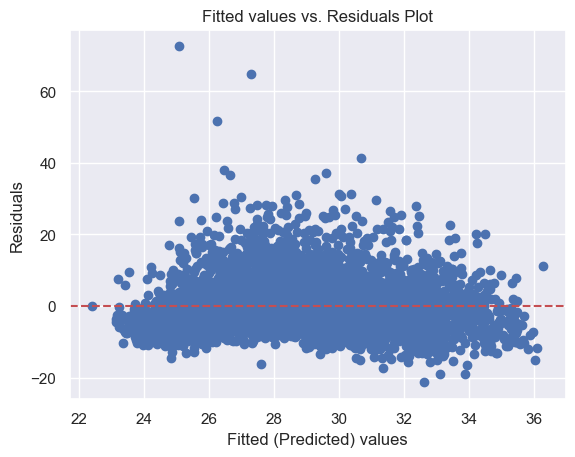

In [251]:
pred = model.predict(df)
residuals = df['bmi'] - pred

plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

In [84]:
resid = model.resid

In [85]:
resid.mean()

4.9685873454129255e-14

Based on this chart the linearity assumption is met. It looks like we have an even amount of positive and negative residiuals as we move from left to right on the chart. Also, taking a look at the residuals, we can see that the average of the residuals is approximately 0 which is promising.

After creating a model based on predictors we thought would be most influential off first glance, we will now perform feature selection (forward selection), to find the most optimal model for predicting BMI.

We chose forward selection for a couple of different reasons. First off this is a relatively smaller dataset with only 10 possible variables as predictors. We were focused on the impact of each variable in relation to BMI and wanted to display the effect of adding different predicting features in 1 by 1 in the most optimal way. Also we were not worried about including an L1 or L2 penalty because of the amount of variables we had. 

In [313]:
model1 = smf.ols('bmi~1', data=df).fit()
model1.rsquared_adj

-8.881784197001252e-16

In [87]:
model_gender_1 = smf.ols('bmi~gender', data=df).fit()
model_gender_1.rsquared_adj

0.0004808556319898516

In [88]:
model_age_1 = smf.ols('bmi~age', data=df).fit()
model_age_1.rsquared_adj

0.1109171813309634

In [89]:
model_hyper_1 = smf.ols('bmi~hypertension', data=df).fit()
model_hyper_1.rsquared_adj

0.027948817491049383

In [90]:
model_heart_1 = smf.ols('bmi~heart_disease', data=df).fit()
model_heart_1.rsquared_adj

0.0015040315636229984

In [91]:
model_married_1 = smf.ols('bmi~ever_married', data=df).fit()
model_married_1.rsquared_adj

0.1164783254640096

In [92]:
model_work_1 = smf.ols('bmi~work_type', data=df).fit()
model_work_1.rsquared_adj

0.20251838616980733

In [93]:
model_residence_1 = smf.ols('bmi~Residence_type', data=df).fit()
model_residence_1.rsquared_adj

-0.0002037459351216242

In [94]:
model_glucose_1 = smf.ols('bmi~avg_glucose_level', data=df).fit()
model_glucose_1.rsquared_adj

0.030663017055239217

In [95]:
model_smoking_1 = smf.ols('bmi~smoking_status', data=df).fit()
model_smoking_1.rsquared_adj

0.07393150806356774

In [97]:
model_stroke_1 = smf.ols('bmi~stroke', data=df).fit()
model_stroke_1.rsquared_adj

0.001589317137632884

Level 1 : Work Type .2025

In [98]:
model_gender_2 = smf.ols('bmi~work_type + gender', data=df).fit()
model_gender_2.rsquared_adj

0.2026008839326564

In [99]:
model_age_2 = smf.ols('bmi~work_type + age', data=df).fit()
model_age_2.rsquared_adj

0.2061625669830831

In [100]:
model_hyper_2 = smf.ols('bmi~work_type + hypertension', data=df).fit()
model_hyper_2.rsquared_adj

0.2148614525655661

In [101]:
model_heart_2 = smf.ols('bmi~work_type + heart_disease', data=df).fit()
model_heart_2.rsquared_adj

0.20235781319081902

In [102]:
model_married_2 = smf.ols('bmi~work_type + ever_married', data=df).fit()
model_married_2.rsquared_adj

0.21495438928543154

In [103]:
model_resid_2 = smf.ols('bmi~work_type + Residence_type', data=df).fit()
model_resid_2.rsquared_adj

0.20235615785570105

In [104]:
model_glucose_2 = smf.ols('bmi~work_type + avg_glucose_level', data=df).fit()
model_glucose_2.rsquared_adj

0.2194552502003505

In [105]:
model_smoking_2 = smf.ols('bmi~work_type + smoking_status', data=df).fit()
model_smoking_2.rsquared_adj

0.20466205206931054

In [106]:
model_stroke_2 = smf.ols('bmi~work_type + stroke', data=df).fit()
model_stroke_2.rsquared_adj

0.20238734401809932

Level 2 : bmi~ work_type + avg_glucose_level = .2194

In [107]:
model_gender_3 = smf.ols('bmi~work_type + avg_glucose_level + gender', data=df).fit()
model_gender_3.rsquared_adj

0.21934988779906028

In [108]:
model_age_3 = smf.ols('bmi~work_type + avg_glucose_level + age', data=df).fit()
model_age_3.rsquared_adj

0.22045677503225658

In [109]:
model_hyper_3 = smf.ols('bmi~work_type + avg_glucose_level + hypertension', data=df).fit()
model_hyper_3.rsquared_adj

0.22765688358828862

In [110]:
model_heart_3 = smf.ols('bmi~work_type + avg_glucose_level + heart_disease', data=df).fit()
model_heart_3.rsquared_adj

0.21960305453754692

In [111]:
model_married_3 = smf.ols('bmi~work_type + avg_glucose_level + ever_married', data=df).fit()
model_married_3.rsquared_adj

0.22902159708410375

In [112]:
model_resid_3 = smf.ols('bmi~work_type + avg_glucose_level + Residence_type', data=df).fit()
model_resid_3.rsquared_adj

0.2192961472454903

In [113]:
model_smoke_3 = smf.ols('bmi~work_type + avg_glucose_level + smoking_status', data=df).fit()
model_smoke_3.rsquared_adj

0.2207970943949742

In [114]:
model_stroke_3 = smf.ols('bmi~work_type + avg_glucose_level + stroke', data=df).fit()
model_stroke_3.rsquared_adj

0.2194270132506546

Level 3: bmi~work_type + avg_glucose_level + ever_married = .2290

In [115]:
model_gender_4 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + gender', data=df).fit()
model_gender_4.rsquared_adj

0.22890140356877464

In [116]:
model_age_4 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + age', data=df).fit()
model_age_4.rsquared_adj

0.22911503472291272

In [117]:
model_hyper_4 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension', data=df).fit()
model_hyper_4.rsquared_adj

0.23584407308813893

In [118]:
model_heart_4 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + heart_disease', data=df).fit()
model_heart_4.rsquared_adj

0.2293787985775252

In [119]:
model_resid_4 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + Residence_type', data=df).fit()
model_resid_4.rsquared_adj

0.22886426611742017

In [120]:
model_smoke_4 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + smoking_status', data=df).fit()
model_smoke_4.rsquared_adj

0.22965858482939705

In [121]:
model_stroke_4 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + stroke', data=df).fit()
model_stroke_4.rsquared_adj

0.22914684927235074

Level 4: bmi~work_type + avg_glucose_level + ever_married + hypertension = .2358

In [122]:
model_gender_5 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + gender', data=df).fit()
model_gender_5.rsquared_adj

0.23570495138143366

In [123]:
model_age_5 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age', data=df).fit()
model_age_5.rsquared_adj

0.23674712765954276

In [124]:
model_heart_5 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + heart_disease', data=df).fit()
model_heart_5.rsquared_adj

0.2365274526914657

In [125]:
model_resid_5 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + Residence_type', data=df).fit()
model_resid_5.rsquared_adj

0.23568809117469236

In [126]:
model_smoke_5 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + smoking_status', data=df).fit()
model_smoke_5.rsquared_adj

0.23616175313191745

In [127]:
model_stroke_5 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + stroke', data=df).fit()
model_stroke_5.rsquared_adj

0.23636034517601878

Level 5: bmi~work_type + avg_glucose_level + ever_married + hypertension + age = .2367

In [128]:
model_gender_6 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + gender', data=df).fit()
model_gender_6.rsquared_adj

0.23661467338289122

In [129]:
model_heart_6 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + heart_disease', data=df).fit()
model_heart_6.rsquared_adj

0.23708374838458224

In [130]:
model_resid_6 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + Residence_type', data=df).fit()
model_resid_6.rsquared_adj

0.23659144991962366

In [131]:
model_smoke_6 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status', data=df).fit()
model_smoke_6.rsquared_adj

0.23722695477814026

In [132]:
model_stroke_6 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + stroke', data=df).fit()
model_stroke_6.rsquared_adj

0.2369866526308142

Level 6: bmi~ work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status = .23722

In [133]:
model_gender_7 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + gender', data=df).fit()
model_gender_7.rsquared_adj

0.23708697453492888

In [134]:
model_heart_7 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease', data=df).fit()
model_heart_7.rsquared_adj

0.23760178264835285

In [135]:
model_resid_7 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + Residence_type', data=df).fit()
model_resid_7.rsquared_adj

0.23707113952558634

In [136]:
model_stroke_7 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + stroke', data=df).fit()
model_stroke_7.rsquared_adj

0.2374846631381542

Level 7 : bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease = .2376

In [137]:
model_gender_8 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + gender', data=df).fit()
model_gender_8.rsquared_adj

0.23747924934640396

In [138]:
model_resid_8 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + Residence_type', data=df).fit()
model_resid_8.rsquared_adj

0.23744607152483

In [139]:
model_stroke_8 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + stroke', data=df).fit()
model_stroke_8.rsquared_adj

0.2378065056087172

Level 8 : bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + stroke = .237718

In [140]:
model_gender_9 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + stroke + gender', data=df).fit()
model_gender_9.rsquared_adj

0.23768265936968735

In [141]:
model_resid_9 = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + stroke + Residence_type', data=df).fit()
model_resid_9.rsquared_adj

0.23765076780326466

In this round our adjusted R2 did not increase. 

Forward Selection Model: 

final model = bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + stroke

This model does not include Gender & Residence_type

In [142]:
final_model = smf.ols('bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + stroke', data=df).fit()
final_model.rsquared_adj


0.2378065056087172

With an adjusted R2 value of .2378, approxiamtely 23.78% of the variance in the dependent variable is explained by the independent variabales in our final model. This value is low, it suggests that the model does not capture a large portion of the variance in bmi and the model's predictions will not be reliable.

In [314]:
#Forward selection model
from sklearn.metrics import mean_squared_error
df_pred = final_model.predict (df)
rms = mean_squared_error(df['bmi'], df_pred, squared=False)
rms

6.847324513334732

In [315]:
#Original Model
from sklearn.metrics import mean_squared_error
df_pred_1 = model.predict (df)
rms = mean_squared_error(df['bmi'], df_pred_1, squared=False)
rms

7.352240609502648

Based on the RMSE, we can see that our parsimonious model outperformed our original model. It has a lower RMSE which indicates the average difference between the models predicted values and the actual values. The forward selection model is more accurate. 

In [145]:
final_model.params

Intercept                            26.734849
work_type[T.Never_worked]            -3.132808
work_type[T.Private]                  0.021364
work_type[T.Self-employed]           -0.474623
work_type[T.children]                -8.552651
ever_married[T.Yes]                   2.116629
smoking_status[T.formerly smoked]     0.786398
smoking_status[T.never smoked]        0.358055
smoking_status[T.smokes]              0.607406
avg_glucose_level                     0.020387
hypertension                          2.537691
age                                  -0.014981
heart_disease                        -0.831021
stroke                               -0.769184
dtype: float64

In [146]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     118.8
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          2.34e-279
Time:                        18:47:22   Log-Likelihood:                -16406.
No. Observations:                4908   AIC:                         3.284e+04
Df Residuals:                    4894   BIC:                         3.293e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            26.7348      0.494     54.147      0.000      25.767      27.703
work_type[T.Never_worked]            -3.1328      1.508     -2.078      0.038      -6.089      -0.177
work_type[T.Private]                  0.0214      0.304      0.070      0.944      -0.576       0.618
work_type[T.Self-employed]           -0.4746      0.373     -1.274      0.203      -1.205       0.256
work_type[T.children]                -8.5527      0.500    -17.112      0.000      -9.532      -7.573
ever_married[T.Yes]                   2.1166      0.289      7.316      0.000       1.549       2.684
smoking_status[T.formerly smoked]     0.7864      0.330      2.383      0.017       0.139       1.433
smoking_status[T.never smoked]        0.3581      0.271      1.320      0.187      -0.174       0.890
smoking_status[T.smokes]              0.6074      0.339      1.793      0.073      -0.057       1.272
avg_glucose_level                     0.0204      0.002      8.843      0.000       0.016       0.025
hypertension                          2.5377      0.358      7.094      0.000       1.836       3.239
age                                  -0.0150      0.007     -2.006      0.045      -0.030      -0.000
heart_disease                        -0.8310      0.475     -1.751      0.080      -1.761       0.099
stroke                               -0.7692      0.506     -1.521      0.128      -1.760       0.222
==============================================================================
Omnibus:                     1525.651   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7418.607
Skew:                           1.419   Prob(JB):                         0.00
Kurtosis:                       8.312   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretting age coefficient: 
For every 1 unit increase in a subjects average glucose level, a patients estimated BMI will increase by 0.0204, on average. Holding all other variables constant.

Prediction:

Predict the BMI for an individual that is self employed, married, has never smoked, and is 55.

BMI = 26.7348 - 0.4746 (1) + 2.1166 (1) + 0.3581 (1) - 0.0150 (55) 

Predicted BMI = 27.8999

Research Questions: 
- Is there a linear relationship between an indivdiauls BMI and their gender, age, average glucose level, and their hypertension?

- What variables should be included to build a parsimonious model for predicting bmi?

Our linear regression model quantified the strength of the relationships betwen BMI and our predictor variables separately. Telling us how each variable may increase or decrease BMI. 
Our model also allows us to predict one's BMI based on these factors. 

Through feature selection, we were able to determine which variables impacted a subject's BMI the most. This final model was : 
final model = bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + stroke

Telling us that these predictors were able to best explain the variation of the dependent variable explained by our predictors.


## 3. Logistic Regression and Classification

Logistic Regression Research Questions:

Is there a linear relationship between an individuals age, having hypertension, BMI, and average glucose level, and the likelihood of an individual having a stroke?

How well will our logistic model perform on training data?

How will will our logisitc model perform on new data?


In our original dataset we can see that the stroke variable is highly unbalanced. This is why we chose to create a sample with all of the 'yes' stroke values, and added 1100 random, 'no' stroke values. This gave me a new, balanced dataset with 'yes' stroke representing ~16% of the data rather than ~4%. This is more representative of the population and it eliminates underrepresentation and bias in the dataset, allowing for a more even distribution.

In [316]:

print(df['stroke'].value_counts(normalize=True))

0    0.957416
1    0.042584
Name: stroke, dtype: float64


In [161]:
print(balanced['stroke'].value_counts(normalize=True))

0    0.840336
1    0.159664
Name: stroke, dtype: float64


In [317]:
yes_stroke = df[df['stroke'] == 1]
no_stroke = df[df['stroke']==0]

random_sample = no_stroke.sample(n=1100, random_state = 40)
balanced = pd.concat([yes_stroke, random_sample])
balanced
#This is our sampled, representative dataset.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4875,14785,Female,41.0,0,0,Yes,Private,Rural,92.64,43.8,never smoked,0
3365,59671,Female,39.0,0,0,No,Private,Rural,85.59,33.2,Unknown,0
3502,43397,Male,81.0,0,1,Yes,Self-employed,Rural,68.27,25.0,Unknown,0
2060,68816,Male,59.0,0,0,Yes,Private,Rural,93.90,42.2,never smoked,0


In [182]:
#Train Test split
df_train, df_test = train_test_split(balanced, test_size = 0.2, random_state = 30)

In [318]:
#Scale variables
x_train = df_train[['age', 'hypertension', 'bmi', 'avg_glucose_level']]
Scaler_training = StandardScaler()
Scaled_explanatory_variables = Scaler_training.fit_transform(x_train)
x_train = pd.DataFrame(Scaled_explanatory_variables, columns = x_train.columns)
x_train.head()

,age,hypertension,bmi,avg_glucose_level
0,1.403302,-0.335628,0.312727,-0.236679
1,1.403302,-0.335628,-0.097979,-0.920665
2,-1.132994,-0.335628,-0.521932,-0.294841
3,-1.259808,-0.335628,-1.263851,-0.529181
4,-0.160747,-0.335628,-0.839897,-0.559426


In [186]:
X_test = df_test[['age', 'hypertension', 'bmi', 'avg_glucose_level']]
Scaler_training = StandardScaler()
Scaled_explanatory_variables = Scaler_training.fit_transform(X_test)
X_test = pd.DataFrame(Scaled_explanatory_variables, columns = X_test.columns)
X_test.head()

,age,hypertension,bmi,avg_glucose_level
0,0.239637,-0.379611,-0.279411,-0.541119
1,0.934062,-0.379611,0.259857,-0.168737
2,-0.671797,-0.379611,-0.365204,-0.050133
3,-1.366223,-0.379611,1.485468,0.594009
4,0.543448,-0.379611,-0.083313,-0.636892


In [319]:
#Logisitc Model
log_model = smf.logit('stroke ~ age + hypertension + bmi + avg_glucose_level', data=df_train).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.332285
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 1047
Model:                          Logit   Df Residuals:                     1042
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.2455
Time:                        00:23:53   Log-Likelihood:                -347.90
converged:                       True   LL-Null:                       -461.13
Covariance Type:            nonrobust   LLR p-value:                 7.653e-48
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -6.2523      0.673     -9.292      0.000      -7.571      -4.933
age                   0.0666      0.007      9.958      0.000       0.054       0.080
hypertension          0.7919      0.241      3.286      0.001       0.320       1.264
bmi                   0.0098      0.015      0.654      0.513      -0.020       0.039
avg_glucose_level     0.0033      0.002      1.890      0.059      -0.000       0.007
=====================================================================================
"""

Ln(p-hat/ 1 - p-hat) = -6.2523 + 0.0666 (age) + 0.7919 (hypertension) + 0.0098(bmi) + 0.0033 (avg_glucose)

In [231]:
log_model.prsquared

0.24554302767546732

The pseudo-R2 tells us how well the independent variables explain the variation in the dependent varaible and the overall strength.

In [323]:
from sklearn.metrics import roc_curve, auc

In [324]:
df_train['p-hat'] = log_model.predict(df_train)
fprs, tprs, thresholds = roc_curve(y_true = df_train['stroke'],
                                  y_score = df_train['p-hat'])

In [325]:
pd.DataFrame({'fpr':fprs, 'tpr':tprs})

,fpr,tpr
0,0.000000,0.000000
1,0.001138,0.000000
2,0.001138,0.011905
3,0.002275,0.011905
4,0.002275,0.017857
...,...,...
251,0.646189,0.988095
252,0.646189,0.994048
253,0.857793,0.994048
254,0.857793,1.000000


In [326]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true = df_train['stroke'],
                   y_score = df_train['p-hat'])
auc

0.8376808061108403

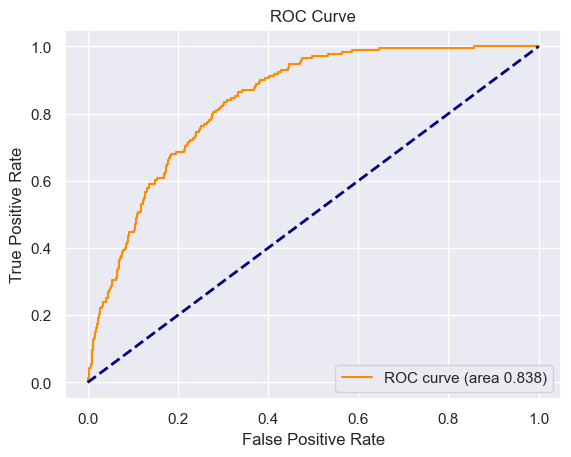

In [327]:
#Train ROC
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = 'darkorange',
        label = 'ROC curve (area '+str(round(auc, 3))+')')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()
plot_roc(fprs, tprs, auc)

In the context of our question we would want to limit the false negatives and choose a threshold that maximizes our true positive rate. This is because a false negative would be predicting someone not to have a stroke, but them actually having one. Based on this criteria I would want to select a threshold ~ TPR ~ 0.68 and a FPR ~.19.



In [254]:
from sklearn.metrics import confusion_matrix
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'fpr':[fpr], 
                         'tpr':[tpr]})

In [255]:
import numpy as np
for thresh in np.arange(0,1.01,.01):
    print(fpr_tpr_thresh(df_train['stroke'], df_train['p-hat'], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold       fpr       tpr
0       0.01  0.821388  0.994048
   threshold      fpr       tpr
0       0.02  0.70876  0.994048
   threshold       fpr       tpr
0       0.03  0.631399  0.988095
   threshold       fpr       tpr
0       0.04  0.575654  0.982143
   threshold       fpr      tpr
0       0.05  0.536974  0.97619
   threshold       fpr       tpr
0       0.06  0.497156  0.964286
   threshold       fpr       tpr
0       0.07  0.467577  0.946429
   threshold       fpr       tpr
0       0.08  0.439135  0.928571
   threshold       fpr       tpr
0       0.09  0.426621  0.922619
   threshold       fpr       tpr
0        0.1  0.401593  0.904762
   threshold       fpr       tpr
0       0.11  0.379977  0.892857
   threshold       fpr       tpr
0       0.12  0.354949  0.869048
   threshold       fpr       tpr
0       0.13  0.337884  0.863095
   threshold       fpr      tpr
0       0.14  0.326507  0.85119
   threshold       fpr       tpr
0  

Based on the TPR & FPR I chose, the threshold would be ~ .23.

This is a good predictive probability threshold because our main goal is to reduce the false negative rate while maximizing our true positive rate. 

Now we will do the same on the test data to see how well our model performs on new data. 

In [246]:
df_test['p-hat'] = log_model.predict(df_test)
fprs_test, tprs_test, thresholds_test = roc_curve(y_true = df_test['stroke'],
                                  y_score = df_test['p-hat'])

In [247]:
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(y_true = df_test['stroke'],
                   y_score = df_test['p-hat'])
auc_test

0.8752897031232756

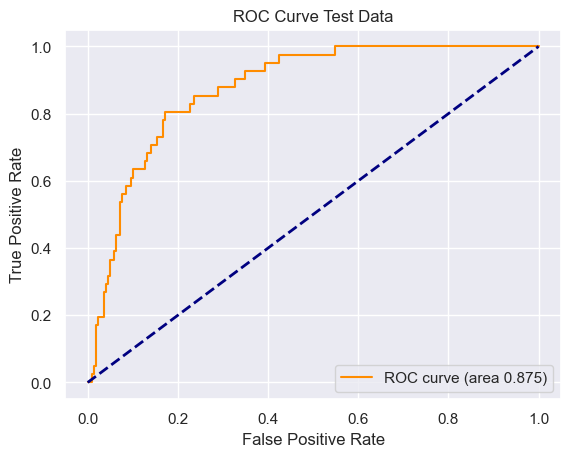

In [251]:
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = 'darkorange',
        label = 'ROC curve (area '+str(round(auc, 3))+')')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Test Data')
    plt.legend(loc = 'lower right')
    plt.show()
plot_roc(fprs_test, tprs_test, auc_test)

In [252]:
auc

0.8376808061108403

In [253]:
auc_test

0.8752897031232756

Based on these results, our model is able to predict values for new data better than our training data. This suggests our model has learned patterns that carry over to new data allowing for better predictions. 
Although this could also be a sign of overfitting, the auc on the test data is not significantly higher than the training data so it seems to be okay.

In [257]:
df_test['y-hat'] = 1 * (df_test['p-hat'] > 0.23)
pd.crosstab(df_test['y-hat'], df_test['stroke'])

stroke,0,1
y-hat,,
0,184,10
1,37,31


In [258]:
#Sensitivity 
31 / (31 + 10)

0.7560975609756098

In [259]:
#Specificity 
184 / (184 + 37)

0.832579185520362

In [260]:
#Accuracy Rate
(184 + 31) / (184 + 10 + 37 + 31)

0.8206106870229007

Is there a linear relationship between an individuals age, having hypertension, BMI, and average glucose level, and the log odds of an individual having a stroke?

How well will our logistic model perform on training data?

How will will our logisitc model perform on new data?

This logisitc regresion model allowed us to see the relationship between predictors and the likelihood of having a stroke by estimating coefficients with each predictor. It measures the log-odds of the stroke occurring. It does not assume a linear relationship like linear regression, instead it gives us a linear combination of the predcitors through the function. 

This technique allowed us to maximize the likelihood of the observed data. Model performance on our training data will assess how the model fits while separating individuals who have had a stroke and those who haven't. 

By testing our model in the test set we are able to see how well our model would predict based on new, unseen data. This helps us understand its generalizability across different datasets. In this case our test performance outscored our training data indicating it would translate well on new data and provide strong predicitve power. 

## 4. Descriptive Analytics and Inference

Inference Research Questions -

What is the relationship between stroke (categorical) and BMI in our dataset?

Is there a significant association between BMI and the occurence of stroke in the population based on sample data?

In [263]:
print(df['bmi'].describe())

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64


In [264]:
balanced['stroke'].value_counts()

0    1100
1     209
Name: stroke, dtype: int64

We are going to start analyzing the relationship between these variables by comparing the summary statistics of our two groups, stroke and non-stroke. 


In [272]:
s_yes = balanced[balanced['stroke'] == 1]
s_no = balanced[balanced['stroke'] == 0]

In [281]:
#Stroke 
s_yes['bmi'].describe()

count    209.000000
mean      30.471292
std        6.329452
min       16.900000
25%       26.400000
50%       29.700000
75%       33.700000
max       56.600000
Name: bmi, dtype: float64

In [283]:
#Stroke Median
s_yes['bmi'].median()

29.7

In [282]:
#No Stroke
s_no['bmi'].describe()

count    1100.000000
mean       28.729636
std         7.887646
min        11.300000
25%        23.200000
50%        27.750000
75%        33.225000
max        63.300000
Name: bmi, dtype: float64

In [284]:
#No Stroke Median
s_no['bmi'].median()

27.75

These summary statistics tell us a few different things, on average individuals who have had a stroke tend to have a higher BMI compared to those who haven't.

This indicates there might be some correlation between having a stroke and higher BMI values just in our dataset.

But now we are interested in looking at this outside of our data and applying this to the greater population, bringing us to our next question:  

"What is the difference in average Body Mass Index (BMI) between individuals who have experienced a stroke and those who have not?"

Based on this question we are going to investigate the difference in two population means.

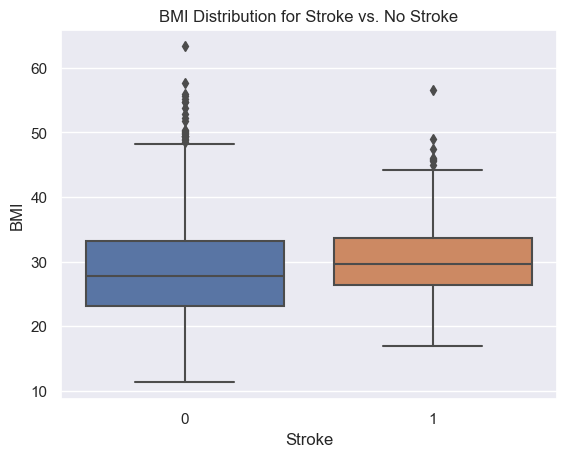

In [285]:
sns.boxplot(x='stroke', y='bmi', data=balanced)
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.title('BMI Distribution for Stroke vs. No Stroke')
plt.show()

Stroke: In general the plot supports that those who have had a stroke tend to have a higher BMI. The larger q3, q1, median and minimum value for those who have had a stroke supports this. There are also a few outliers of extremely higher BMI values. 

No Stroke: As stated above, on average these individuals have lower BMI values. But the presence of numerous large outliers suggests there are some individuals with very large BMI values who have not experienced a stroke. 

Based on this distribution it is going to help pick a side and form a hypothesis as we look to analyze the population difference in means for these two groups. 

Hypothesis: 

H0 (Null) : There is no difference in the average BMI of individuals who have had a stroke and those who have not. 

H0: µ1 - µ2 = 0

H1 (Alternative) : There is a significant difference in the average BMI of individuals who have experienced a stroke and those who haven't.

H1: µ1 - µ2 ≠ 0

In [291]:
#Observed Difference
observed_diff = balanced[balanced['stroke']==1]['bmi'].mean() - balanced[balanced['stroke']==0]['bmi'].mean()
observed_diff

1.7416555023923443

In [295]:
#Hypothesis Test
sample_means = []
for i in range(5000):
    sample = balanced[balanced['stroke']==1]['bmi'].sample(frac=1, replace =True)
    sample_no = balanced[balanced['stroke']==0]['bmi'].sample(frac=1, replace =True)
    
    sample_diff = sample.mean() - sample_no.mean()
    sample_means.append(sample_diff)
    
sample_means = pd.DataFrame({'BMI': sample_means})
sample_means

,BMI
0,1.570383
1,1.376646
2,2.013986
3,1.126388
4,1.823211
...,...
4995,1.910708
4996,1.212947
4997,1.334799
4998,1.561780


In [303]:
p_val = np.sum(np.abs(sample_means) >= np.abs(observed_diff)) / 5000
print(f'P-value: {p_val}')

P-value: BMI    0.4846
dtype: float64


This p-value suggests that approximately 48.46% of the time the difference in mean BMI wil be as or more extreme than the observed difference given that the null hypothesis is true. With significance values being commonly set at .05 or .01, .4846 is greater meaning that we do not have enough evidence to reject the null. 

Therefore our evidence is not significant enough the conclude there is a difference in mean BMI between individuals who had a stsroke and those who have not in the population from our sample. We fail to reject the null. 

Inference Research Questions -
What is the relationship between stroke (categorical) and BMI in our dataset?

Is there a significant association between BMI and the occurence of stroke in the population based on sample data?

Based on the summary statistics, individuals who have had a stroke tend to have a higher mean and median. Solely based on these summary statistics we were able to establish some sort of relationship between the variables. This relationship was further investigated through hypothesis testing to see if this assumption would translate outside of our dataset and into the population. 

Based on our hypothesis test results there was not enough evidence to suggest a significant association between BMI and the occurence of a stroke. This tells us that this assumption made prior is not generalizable to the rest of the population. 

## 5. Conclusion

Conclusion:

Based on our analyses of the relationship between the BMI, predictor values, and the occurence of strokes, we were able to sufficiently address our research questions with evidence to support each explanation through the creation of a model. The linear regression model indentified key influential predictors impacting BMI, telling us which varaibles provided the most for our model. These predictors from forward selectoin included: 
final model = bmi~work_type + avg_glucose_level + ever_married + hypertension + age + smoking_status + heart_disease + stroke

From this point we were able to compare our two linear regression models, quantifying the strength of these relationships through measures like adjusted R2. Based on these models we were able to construct an equation for predicting an individuals BMI based on their attributes. 

Moving onto logisitic regression, this model gave us insight into the log-odds of the likelihood of a stroke occurring. Through our training and test sets, we maximized this likelihood of our observed data. To our pleasant suprise, the test data actually outperformed the training data and provided better predictions on new, unseen data. This is significant as its an example of how models can be used in the real world in order to predict events before they happen, allowing for preventative measures. 

Finally, through inference and descriptive statistics we explored the relationship between having a stroke and BMI. Based on the summary statisitcs, individuals who had a stroke tended to have a higher mean and median BMI. This is where we established a relationship between our two variables. This relationship was further investigated through hypothesis testing to see if this assumption would translate outside of our dataset and into the population. Based on our hypothesis test results there was not enough evidence to suggest a significant association between BMI and the occurence of a stroke. This tells us that this assumption made prior is not generalizable to the rest of the population.


Limitations: 

The main limitations we faced involved preparing our dataset for analysis. After inspecting variables and certain distributions there were a couple concerns that have been explained thorought in comments like dropping observations and most importantly providing an even distribution for our 'stroke' variable as it was underrepresented and subject to bias. Before making any claims it is important to note this dataset was collected as a sample from the World Health Organization and may not be representative of our population as we have no idea how this sample was collected. 

Future Work: 

Future work based on these analyses could lead to further investiagtion into BMI, associated predictors, and storke occurence. This could be substantial research in the medical field, changing the way we view these sudden health risks that are becoming more and more common in our lives. 

One specific example includes allowing peoplpe to understand early risk factors, prompting people to seek intervention and lifestyle changes to minimize the severity. 

This could also be used in generating health care policies aimed for stroke prevention. The information of the BMI and other measures can kickstart awareness campaigns and alter nutritional guidelines. 

Finally research of this nature can lead to medical advancements and innovation. By further exploring these relationships between risk factors and strokes, we can develop treatment, medical plans, etc, by targeting specific risk factors associated with the health issue.




